In [1]:
# pandas, numpy, matplotlib.pyplot 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from glob import glob

In [2]:
# 파일목록보기
files = glob("mini_data/seoul-metro*.csv")
file_paths = sorted(files)
file_paths

['mini_data\\seoul-metro-2017.logs.csv',
 'mini_data\\seoul-metro-2018.logs.csv',
 'mini_data\\seoul-metro-2019.logs.csv',
 'mini_data\\seoul-metro-2020.logs.csv',
 'mini_data\\seoul-metro-2021.logs.csv',
 'mini_data\\seoul-metro-station-info.csv']

In [3]:
df_2019 = pd.read_csv(file_paths[2])

In [4]:
df_2020 = pd.read_csv(file_paths[3])

In [5]:
df_2021 = pd.read_csv(file_paths[4])

In [6]:
df_info = pd.read_csv(file_paths[5])

In [7]:
df_year = pd.concat([df_2019, df_2020, df_2021])
df_year

,timestamp,station_code,people_in,people_out
0,2019-01-01T05:00:00.000+09:00,150,348,222
1,2019-01-01T06:00:00.000+09:00,150,321,821
2,2019-01-01T07:00:00.000+09:00,150,348,808
3,2019-01-01T08:00:00.000+09:00,150,741,961
4,2019-01-01T09:00:00.000+09:00,150,940,1472
...,...,...,...,...
1941548,2021-12-31T19:00:00.000+09:00,2828,74,263
1941549,2021-12-31T20:00:00.000+09:00,2828,73,145
1941550,2021-12-31T21:00:00.000+09:00,2828,95,209
1941551,2021-12-31T22:00:00.000+09:00,2828,54,138


In [8]:
df = pd.merge(df_year,df_info, how='left', left_on='station_code', right_on='station.code')
df.shape

(5972393, 23)

### 날씨데이터 전처리과정

In [9]:
from glob import glob

files_w = glob("mini_data/OBS_ASOS_DD*.csv")
file_paths_w = sorted(files_w)
file_paths_w

['mini_data\\OBS_ASOS_DD_20230202191509.csv',
 'mini_data\\OBS_ASOS_DD_20230202191530.csv',
 'mini_data\\OBS_ASOS_DD_20230202191603.csv']

In [10]:
df_2019w = pd.read_csv(file_paths_w[0], encoding="cp949")

In [11]:
df_2020w = pd.read_csv(file_paths_w[1], encoding="cp949")

In [12]:
df_2021w = pd.read_csv(file_paths_w[2], encoding="cp949")

In [13]:
df_weather = pd.concat([df_2019w, df_2020w, df_2021w])
df_weather

,지점,지점명,일시,평균기온(°C)
0,98,동두천,2019-01-01,-7.0
1,98,동두천,2019-01-02,-6.7
2,98,동두천,2019-01-03,-5.3
3,98,동두천,2019-01-04,-2.7
4,98,동두천,2019-01-05,-3.4
...,...,...,...,...
1820,202,양평,2021-12-27,-8.1
1821,202,양평,2021-12-28,-4.5
1822,202,양평,2021-12-29,-1.4
1823,202,양평,2021-12-30,-2.5


### 중복제거하기

In [14]:
df=df.drop_duplicates()

In [15]:
df_weather=df_weather.drop_duplicates()

### timestamp를 datetime으로 읽어오기

In [23]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

### timestamp를 이용하여 파생변수를 만들기

In [81]:
df["연도"] = df["timestamp"].dt.year
df["일시"] = df["timestamp"].dt.date
df["월"] = df["timestamp"].dt.month
df["일"] = df["timestamp"].dt.day
df["요일"] = df["timestamp"].dt.dayofweek
df["시간"] = df["timestamp"].dt.hour

In [82]:
df[["timestamp","연도","일시","월","일","요일","시간"]].head()

,timestamp,연도,일시,월,일,요일,시간
0,2019-01-01 05:00:00+09:00,2019,2019-01-01,1,1,1,5
1,2019-01-01 06:00:00+09:00,2019,2019-01-01,1,1,1,6
2,2019-01-01 07:00:00+09:00,2019,2019-01-01,1,1,1,7
3,2019-01-01 08:00:00+09:00,2019,2019-01-01,1,1,1,8
4,2019-01-01 09:00:00+09:00,2019,2019-01-01,1,1,1,9


### 연도월만들기

In [26]:
df["연도월"] = df["timestamp"].astype(str).str[:7]

### 데이터타입을 확인해보면 연도, 월, 일, 요일, 시간이 int타입으로 확인된다

In [27]:
df.dtypes

timestamp            datetime64[ns, pytz.FixedOffset(540)]
station_code                                         int64
people_in                                            int64
people_out                                           int64
station.code                                         int64
station.fr_code                                     object
line.num                                             int64
line.name                                           object
line.name_sub                                       object
line.station_seq                                     int64
station.name_full                                   object
station.name                                        object
station.name_chc                                    object
station.name_chn                                    object
station.name_en                                     object
station.name_jp                                     object
geo.latitude                                       float

### 시간별 지하철 사용량

In [29]:
time_in = df[["시간",'people_in','people_out']]
df_time_in = time_in.set_index("시간")
time_in = df_time_in.groupby('시간').sum()

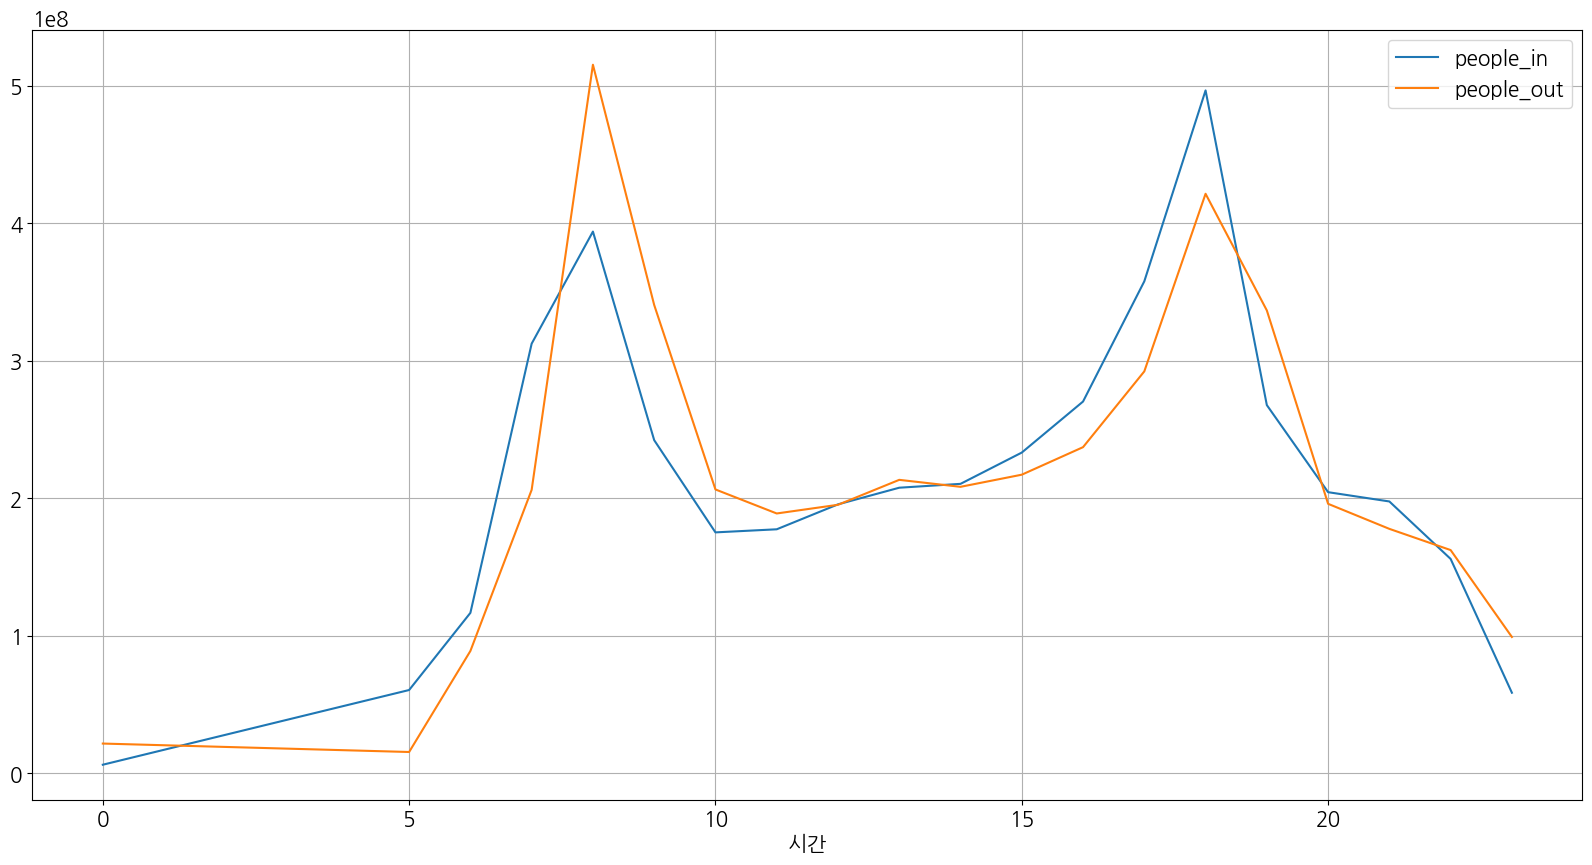

In [32]:
time_in.plot(figsize=(20,10))
plt.rc('font', size=20)
plt.grid()

<AxesSubplot:xlabel='시간'>

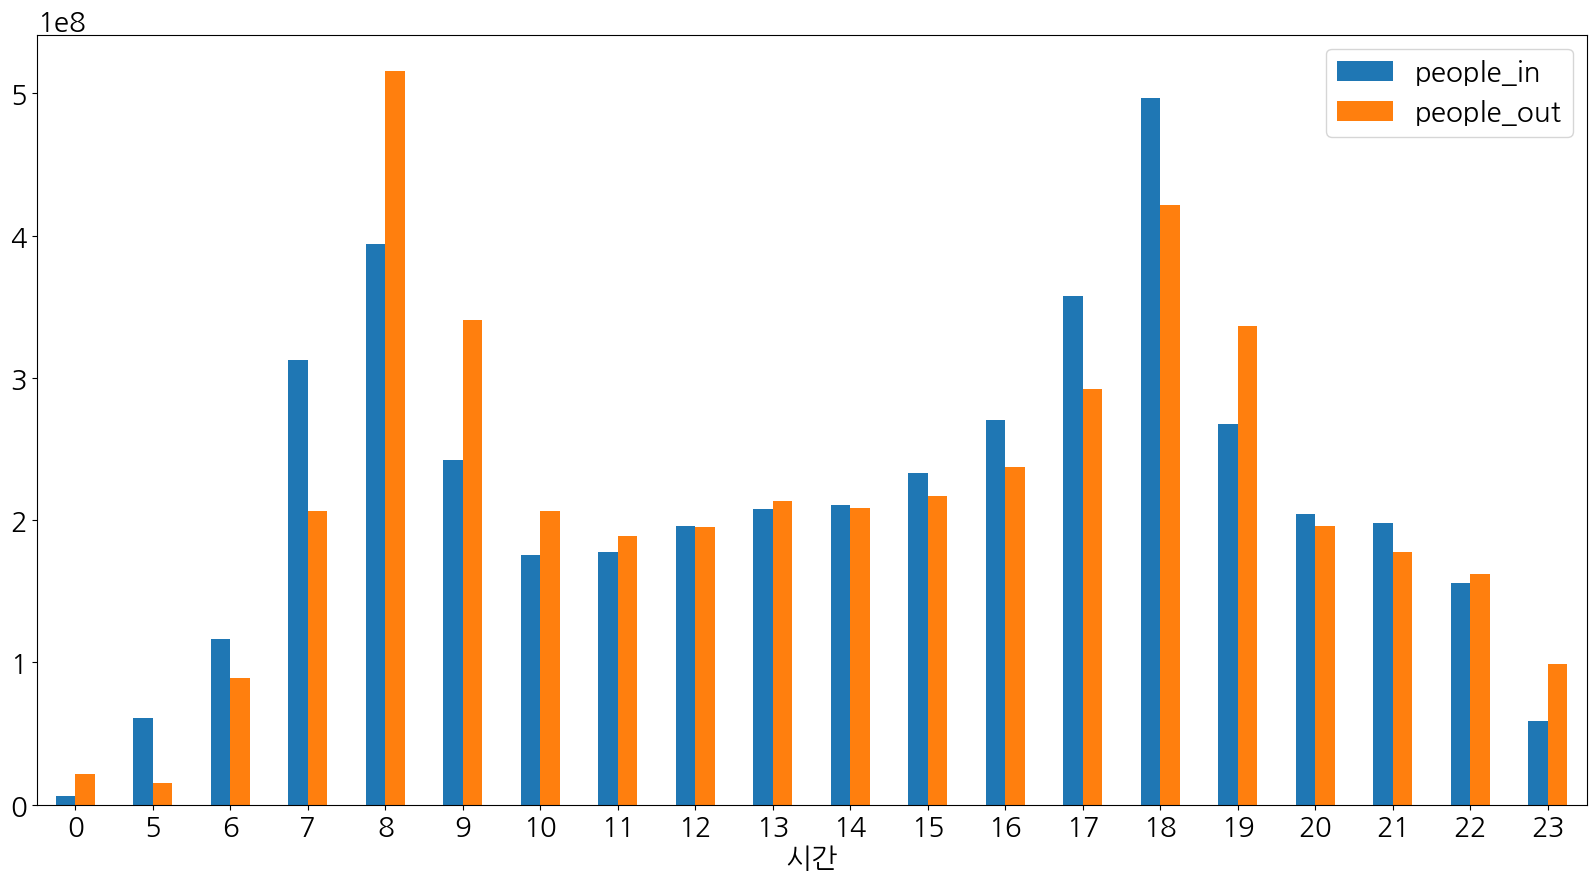

In [33]:
time_in.plot.bar(figsize=(20,10), rot=0)

### 일별 지하철 사용량
### 승차량과 하차량의 비율이 비슷하여 그래프로 만들 시 겹쳐져 승차량만을 가져왔습니다.

In [35]:
day_in = df[["일",'people_in']]
df_day_in = day_in.set_index("일")
day_in = df_day_in.groupby('일').sum()

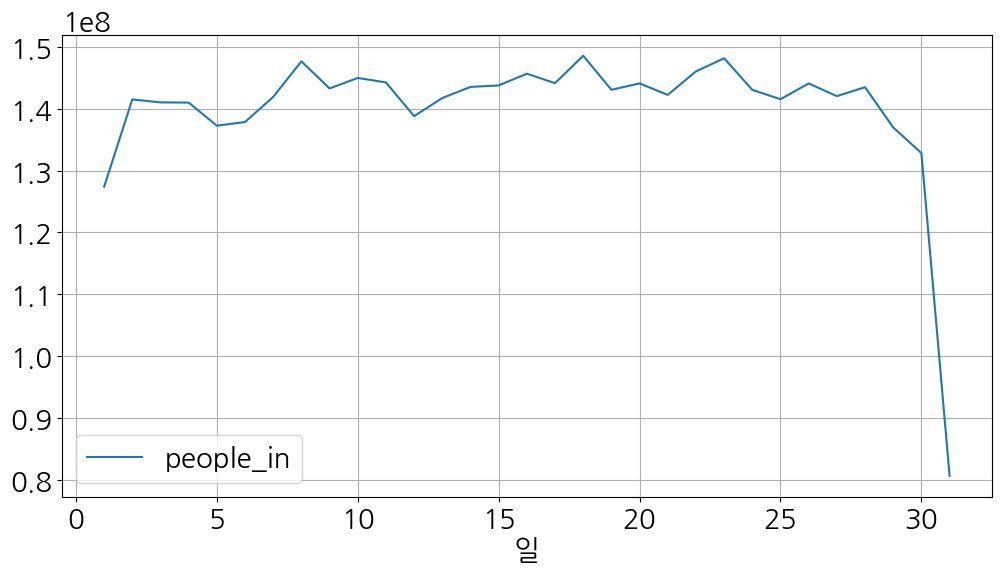

In [36]:
day_in.plot(figsize=(12,6))
plt.grid()

### 월별 지하철 승차량

In [37]:
month_in = df[["월",'people_in']]
df_month_in = month_in.set_index("월")
month_in = df_month_in.groupby('월').sum()

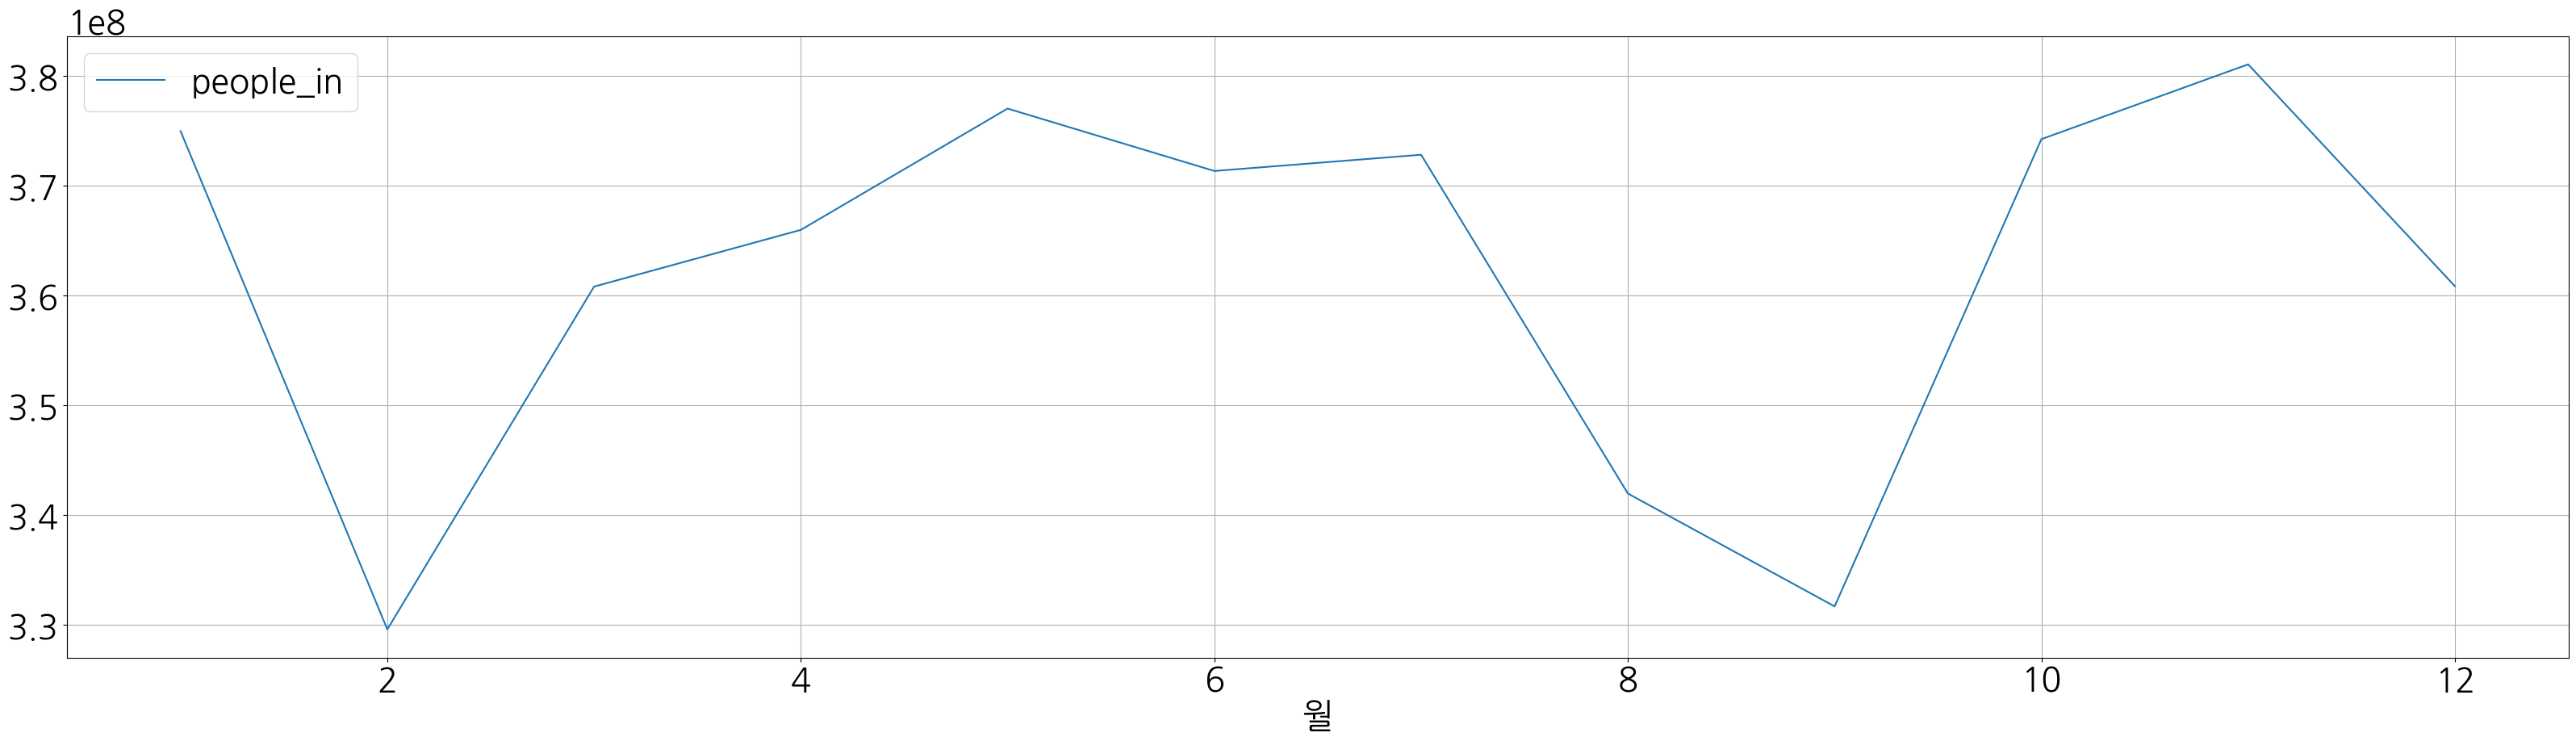

In [96]:
month_in.plot(figsize=(40,10))
plt.grid()

### 연도별 지하철 승차량
### 연도별 단위가 왜 저렇게 나오는지를 모르겠습니다

In [40]:
year_in = df[["연도",'people_in']]
df_year_in = year_in.set_index("연도")
year_in = df_year_in.groupby('연도').sum()

<AxesSubplot:xlabel='연도'>

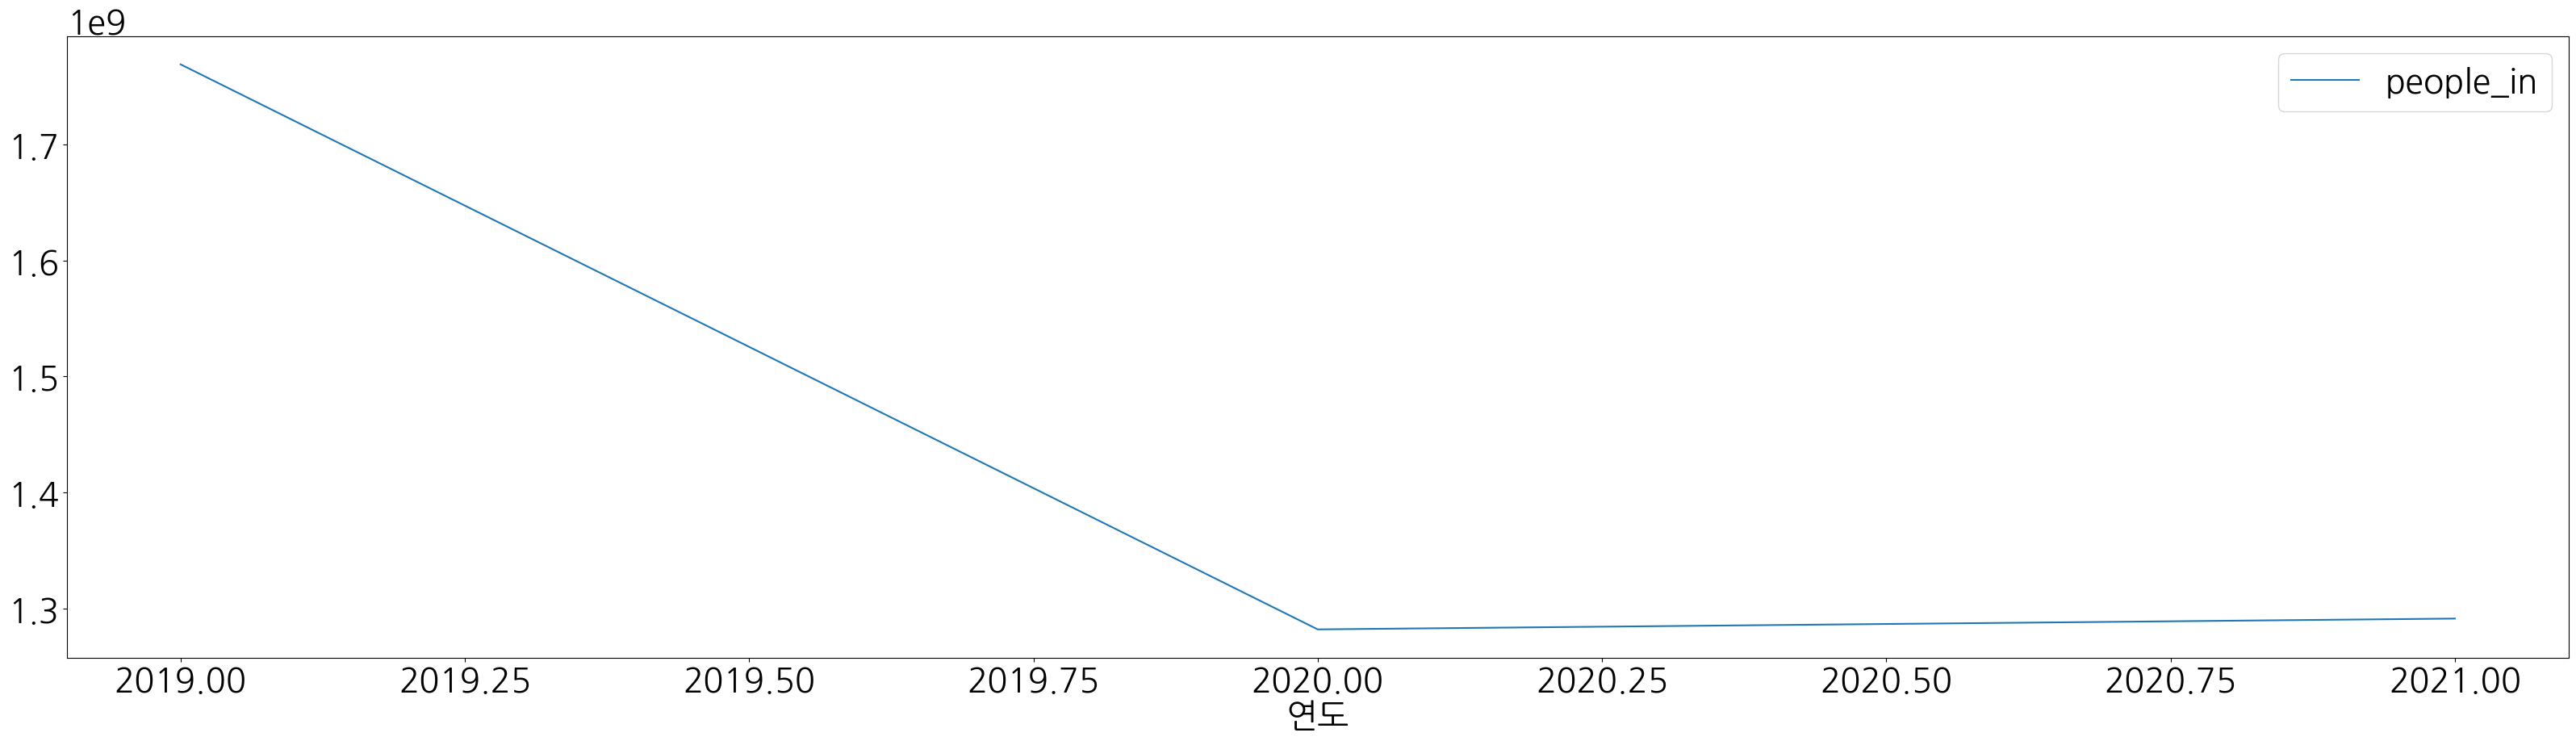

In [97]:
year_in.plot(figsize=(40,10))

### 요일 한글로 만들기

In [42]:
dayofweek = "월화수목금토일"
dayofweek[1]

'화'

In [43]:
def find_dayofweek(day_no):
    dayofweek = "월화수목금토일"
    return dayofweek[day_no]


In [44]:
df["요일명"] = df["요일"].map(find_dayofweek)

### 요일별 지하철 사용량

In [49]:
weekday_in = df[["요일명",'people_in']]
df_weekday_in = weekday_in.set_index("요일명")
weekday_in = df_weekday_in.groupby('요일명').sum()
weekday_in = weekday_in.reindex(["월","화","수","목","금","토","일"])

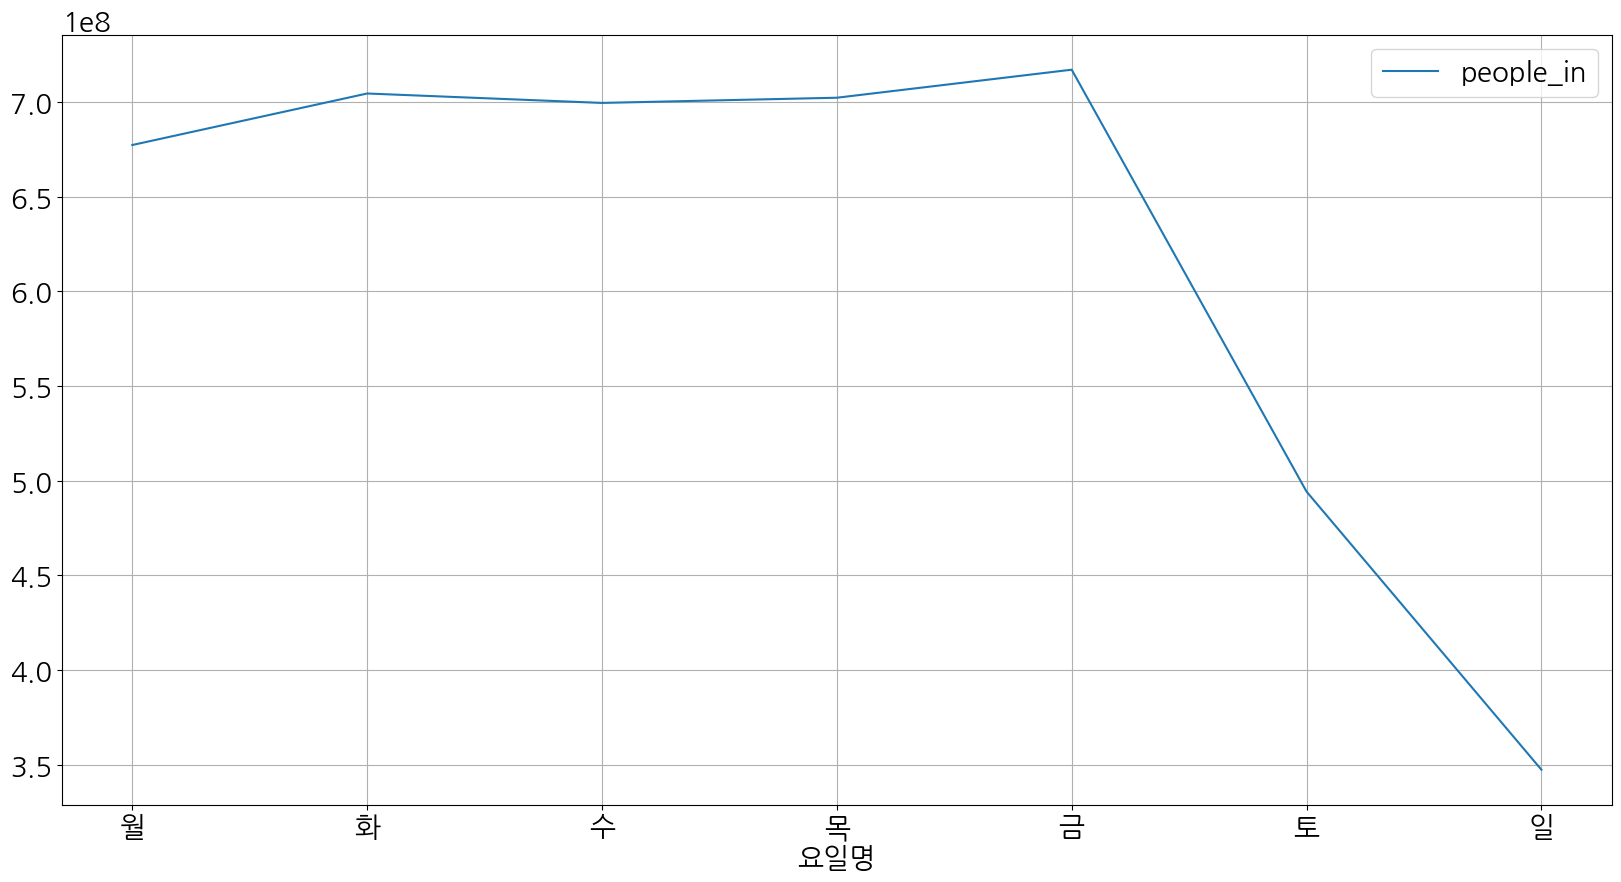

In [50]:
weekday_in.plot(figsize=(20,10))
plt.grid()

### 일시별 지하철 사용량

In [85]:
date_in = df[["일시",'people_in']]
df_date_in = date_in.set_index("일시")
date_in = df_date_in.groupby('일시').sum()

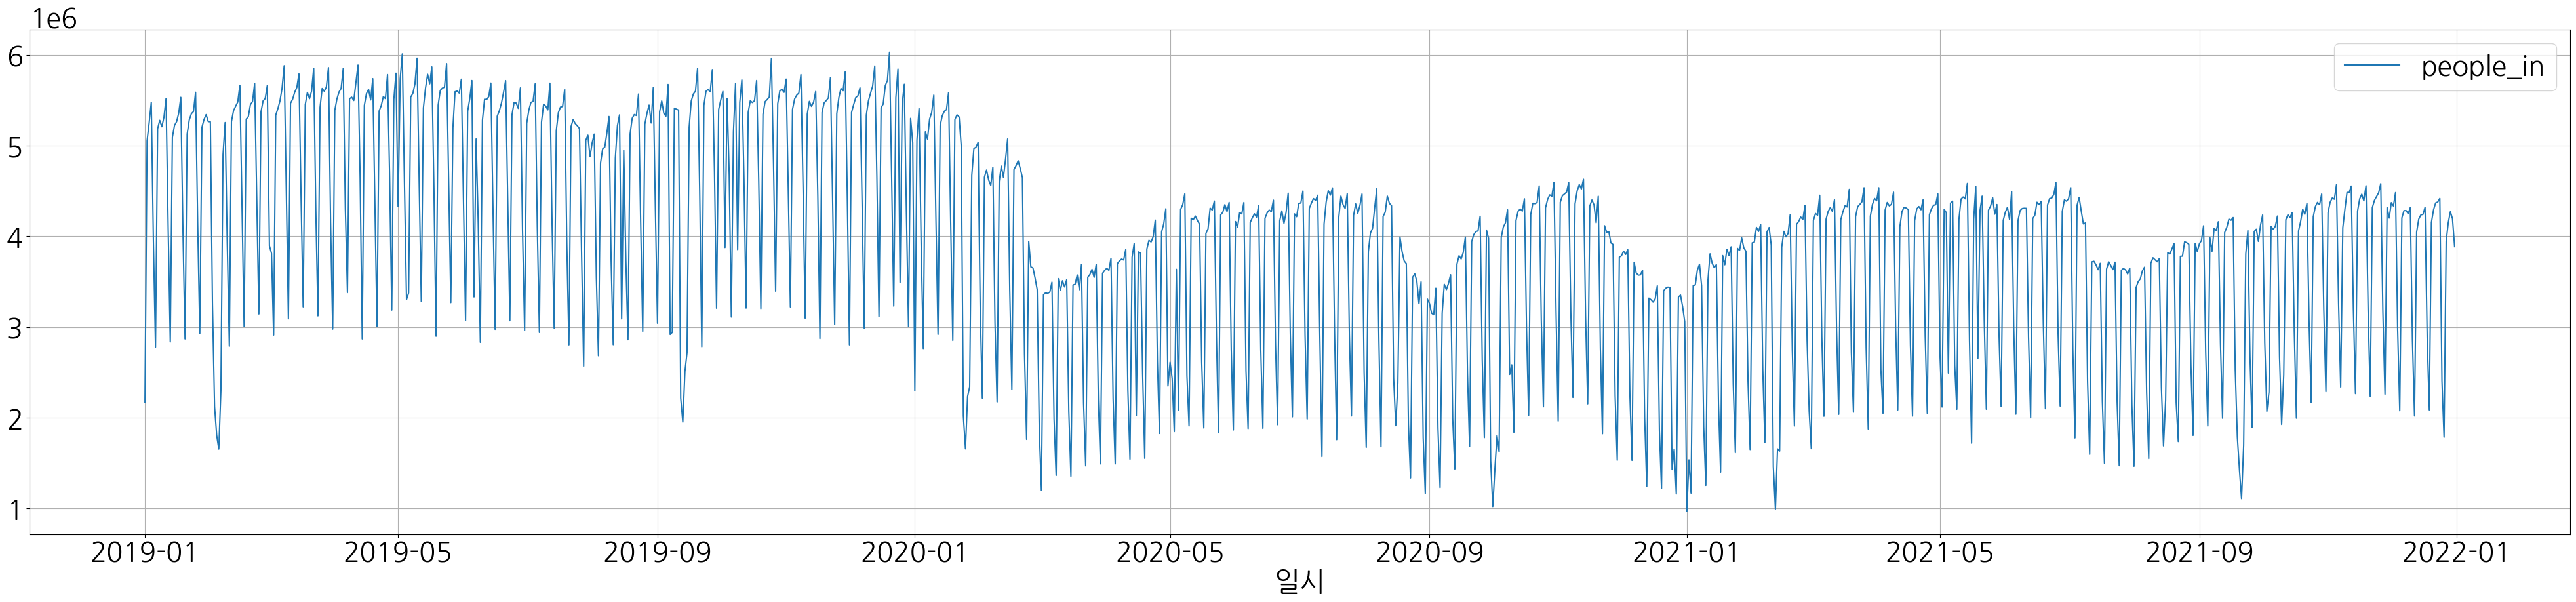

In [87]:
date_in.plot(figsize=(50,10))
plt.grid()

### 날씨 데이터

In [55]:
df_weather.describe(include="object")

,지점명,일시
count,5478,5478
unique,5,1096
top,동두천,2019-01-01
freq,1096,5


In [56]:
df_weather.dtypes

지점            int64
지점명          object
일시           object
평균기온(°C)    float64
dtype: object

In [58]:
df_weather.columns

Index(['지점', '지점명', '일시', '평균기온(°C)'], dtype='object')

### 날씨데이터  '일시'의 파생변수 만들기

In [61]:
df_weather["일시"] = pd.to_datetime(df_weather["일시"])

In [62]:
df_weather["연도"] = df_weather['일시'].dt.year
df_weather["월"] = df_weather['일시'].dt.month
df_weather["일"] = df_weather['일시'].dt.day
df_weather["요일"] = df_weather['일시'].dt.dayofweek

In [63]:
df_weather[['일시',"연도","월","일","요일"]].head()

,일시,연도,월,일,요일
0,2019-01-01,2019,1,1,1
1,2019-01-02,2019,1,2,2
2,2019-01-03,2019,1,3,3
3,2019-01-04,2019,1,4,4
4,2019-01-05,2019,1,5,5


In [64]:
df["월일"] = df['timestamp'].dt.date.astype(str).str[5:]
df["월일"]

0          01-01
1          01-01
2          01-01
3          01-01
4          01-01
           ...  
5972388    12-31
5972389    12-31
5972390    12-31
5972391    12-31
5972392    12-31
Name: 월일, Length: 5972393, dtype: object

In [65]:
df_weather["월일"] = df_weather['일시'].dt.date.astype(str).str[5:]
df_weather["월일"]

0       01-01
1       01-02
2       01-03
3       01-04
4       01-05
        ...  
1820    12-27
1821    12-28
1822    12-29
1823    12-30
1824    12-31
Name: 월일, Length: 5478, dtype: object

### 날씨데이터 일시별 평균기온

In [83]:
date_weather = df_weather[['일시','평균기온(°C)']]
df_date_weather = date_weather.set_index('일시')
date_weather = df_date_weather.groupby('일시').mean().round(1)

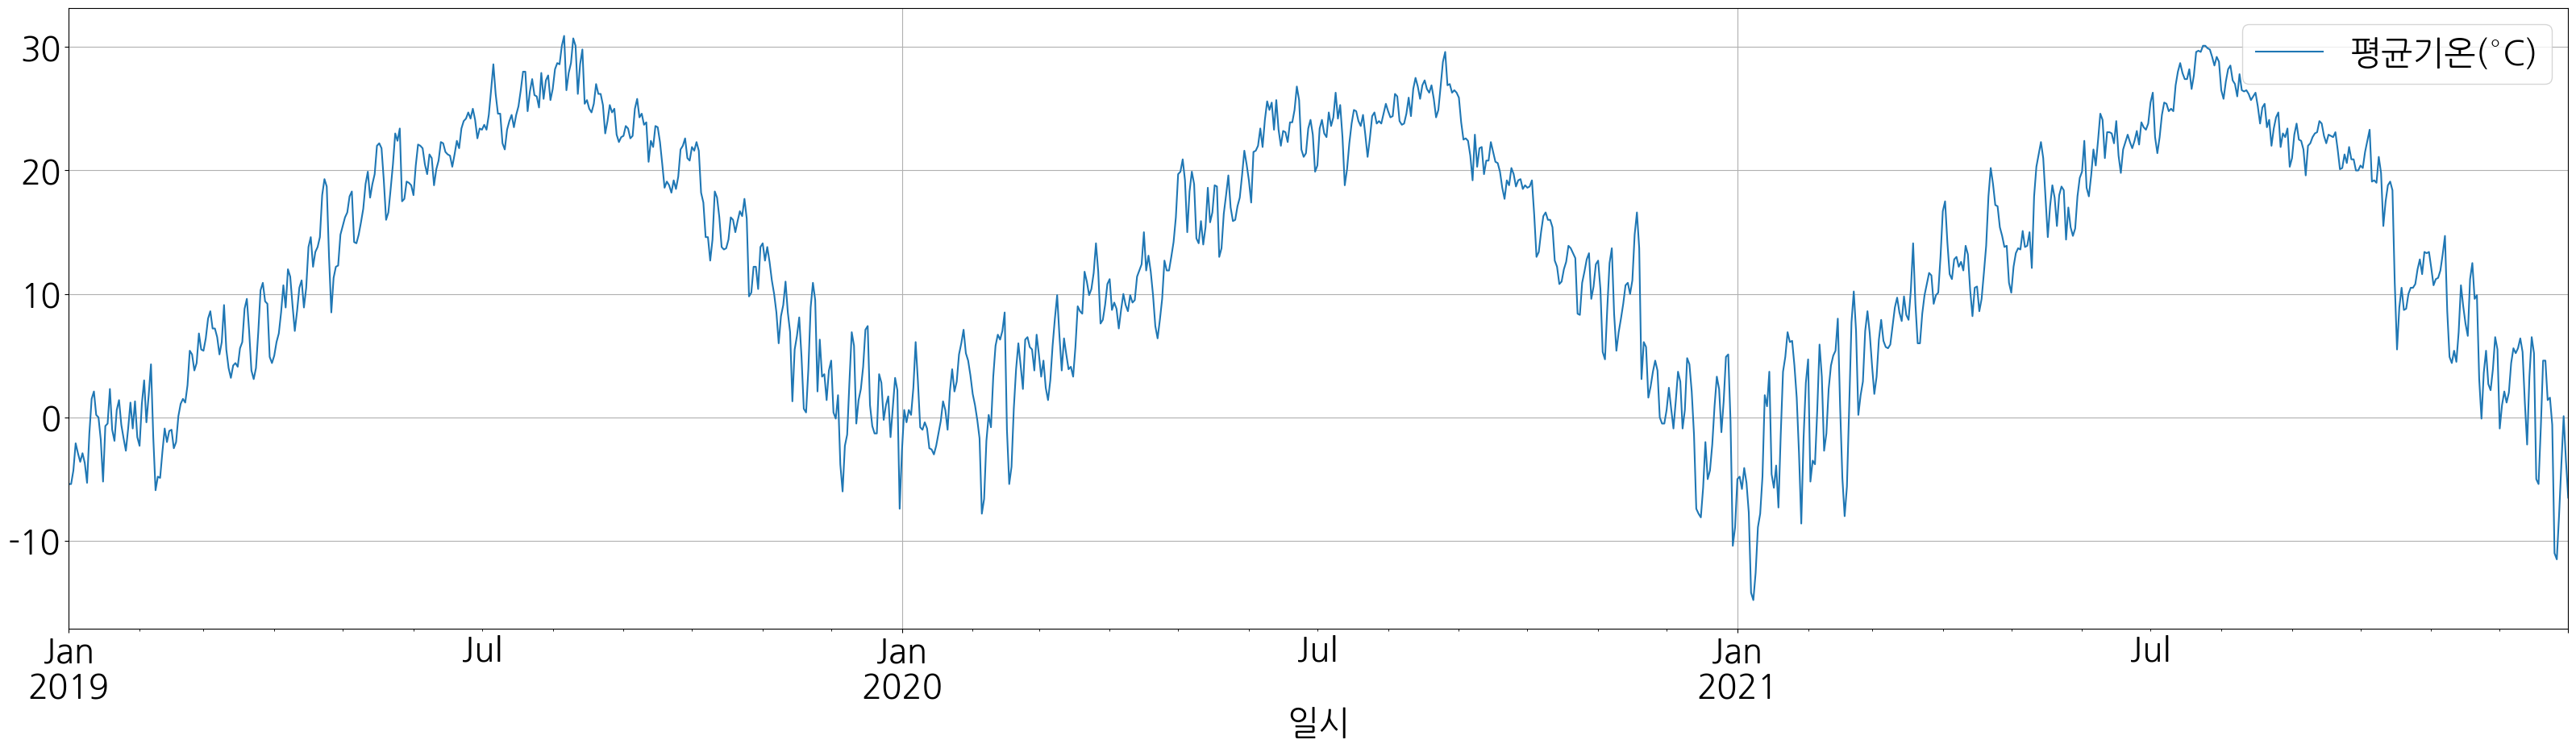

In [84]:
date_weather.plot(figsize=(40,10))
plt.grid()

### 일시별 날씨와 지하철사용량

In [88]:
df_total = pd.concat([date_in, date_weather], axis=1)
df_total

C:\Users\gusdn\AppData\Local\Temp\ipykernel_21124\3874514463.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df_total = pd.concat([date_in, date_weather], axis=1)


,people_in,평균기온(°C)
일시,,
2019-01-01,2169387,-5.4
2019-01-02,5052634,-5.4
2019-01-03,5253555,-4.3
2019-01-04,5476276,-2.1
2019-01-05,3947386,-2.9
...,...,...
2021-12-27,3943406,-7.9
2021-12-28,4149768,-3.8
2021-12-29,4270827,0.1


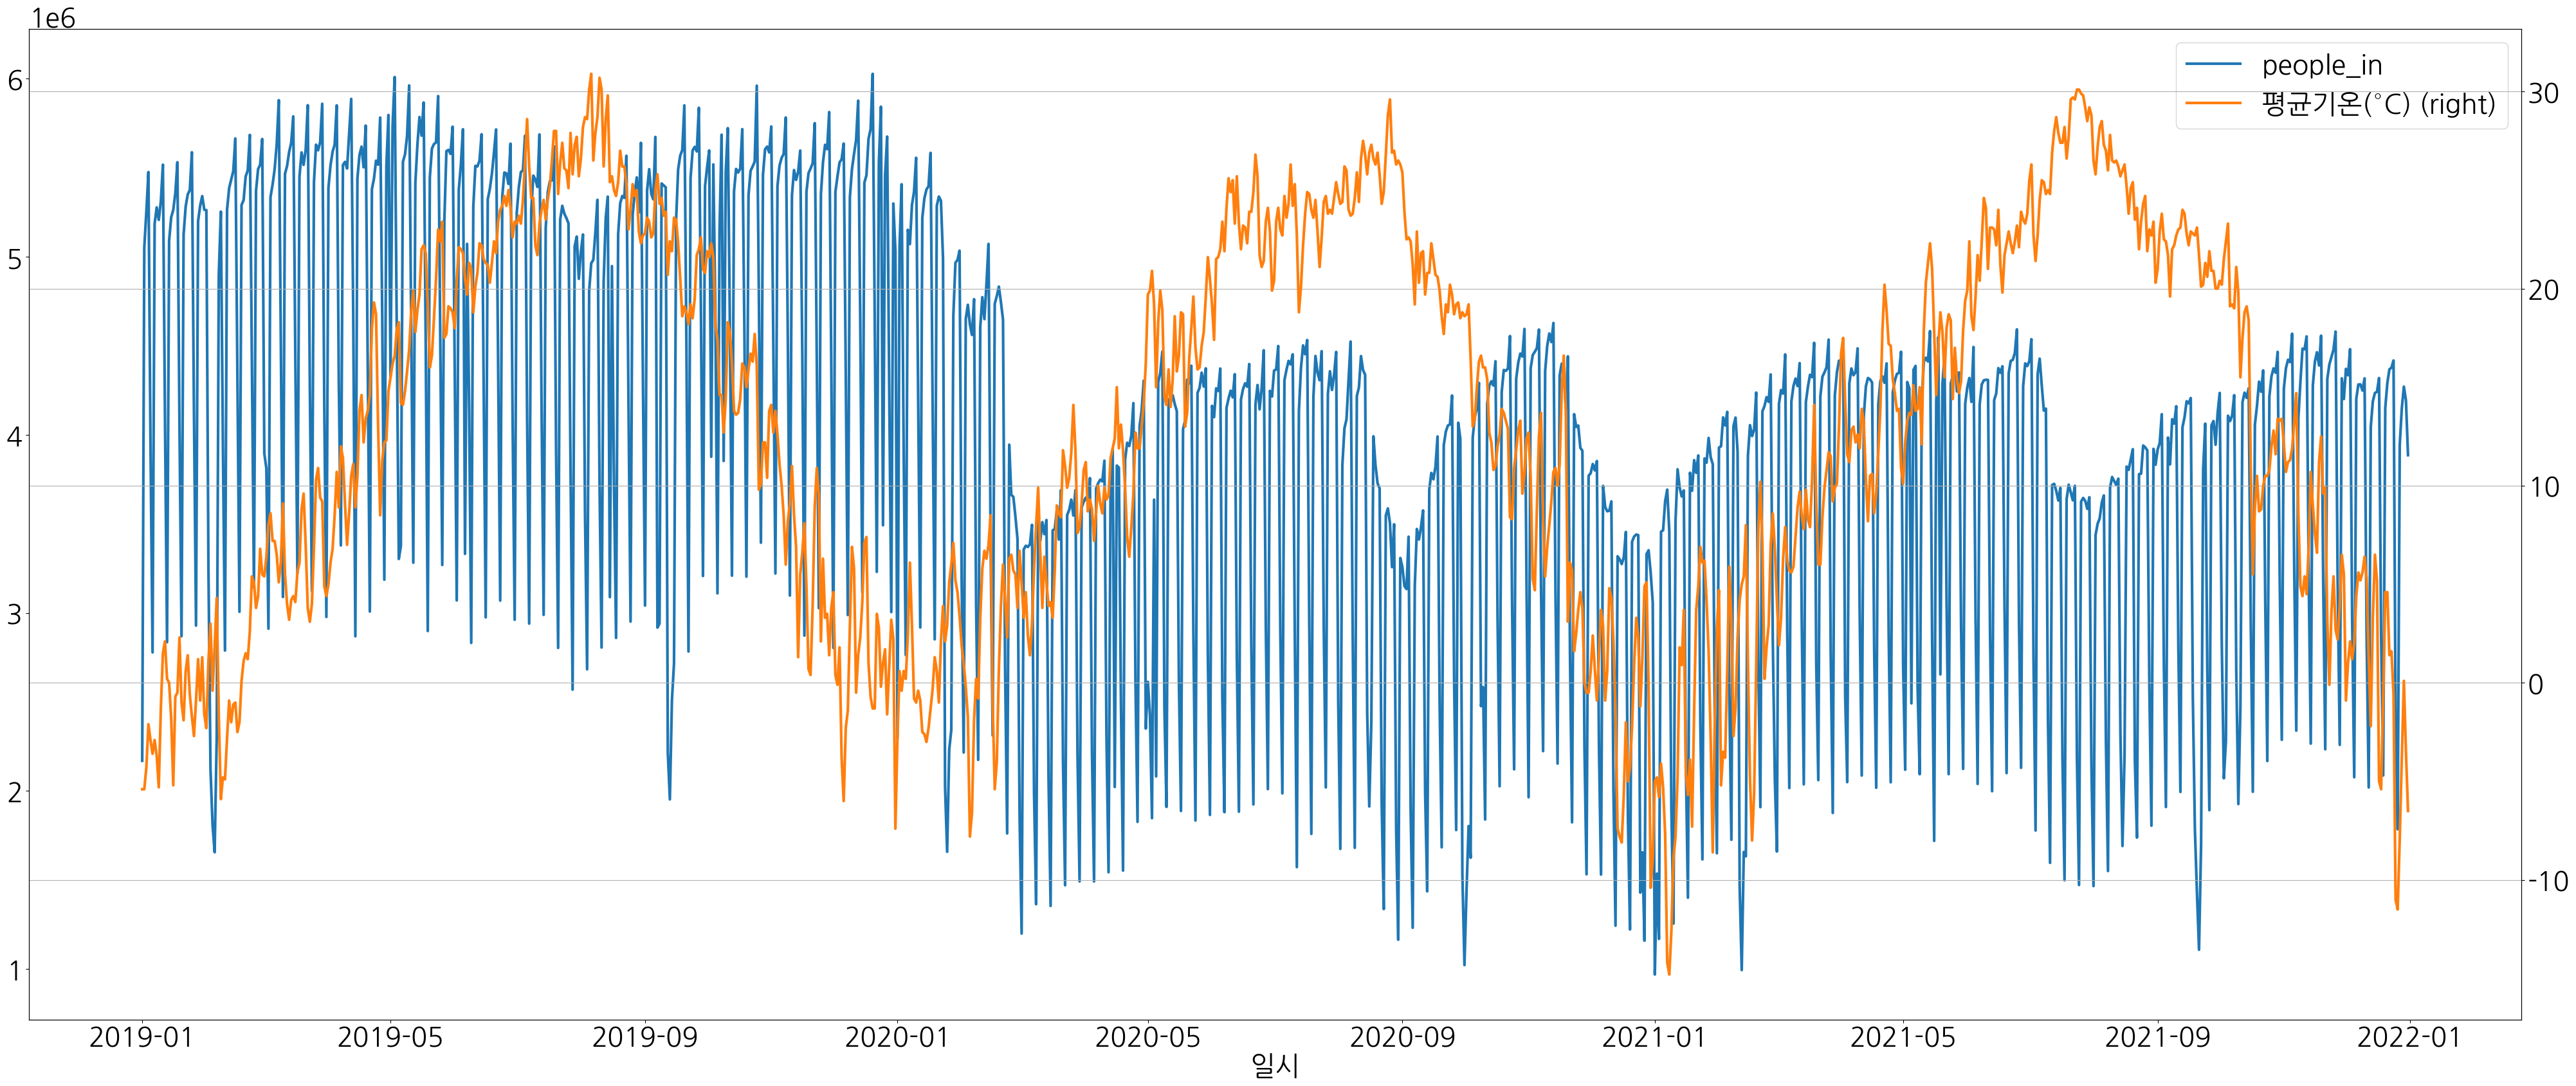

In [89]:
df_total.plot(figsize=(50,20), secondary_y="평균기온(°C)", lw = 3)
plt.rc('font', size=40)
plt.grid()

### 날씨 데이터 월별 평균기온

In [90]:
month_weather = df_weather[["월",'평균기온(°C)']]
df_month_weather = month_weather.set_index("월")
month_weather = df_month_weather.groupby('월').mean().round(1)
month_weather

,평균기온(°C)
월,
1,-1.0
2,1.6
3,7.3
4,11.9
5,17.4
6,22.3
7,25.3
8,25.9
9,21.5


### 월별 지하철 데이터와 날씨데이터를 비교

In [93]:
df_total_m = pd.concat([month_in, month_weather], axis=1)
df_total_m

,people_in,평균기온(°C)
월,,
1,374999372,-1.0
2,329602151,1.6
3,360836107,7.3
4,366003496,11.9
5,377056660,17.4
6,371370091,22.3
7,372848572,25.3
8,341983998,25.9
9,331697062,21.5


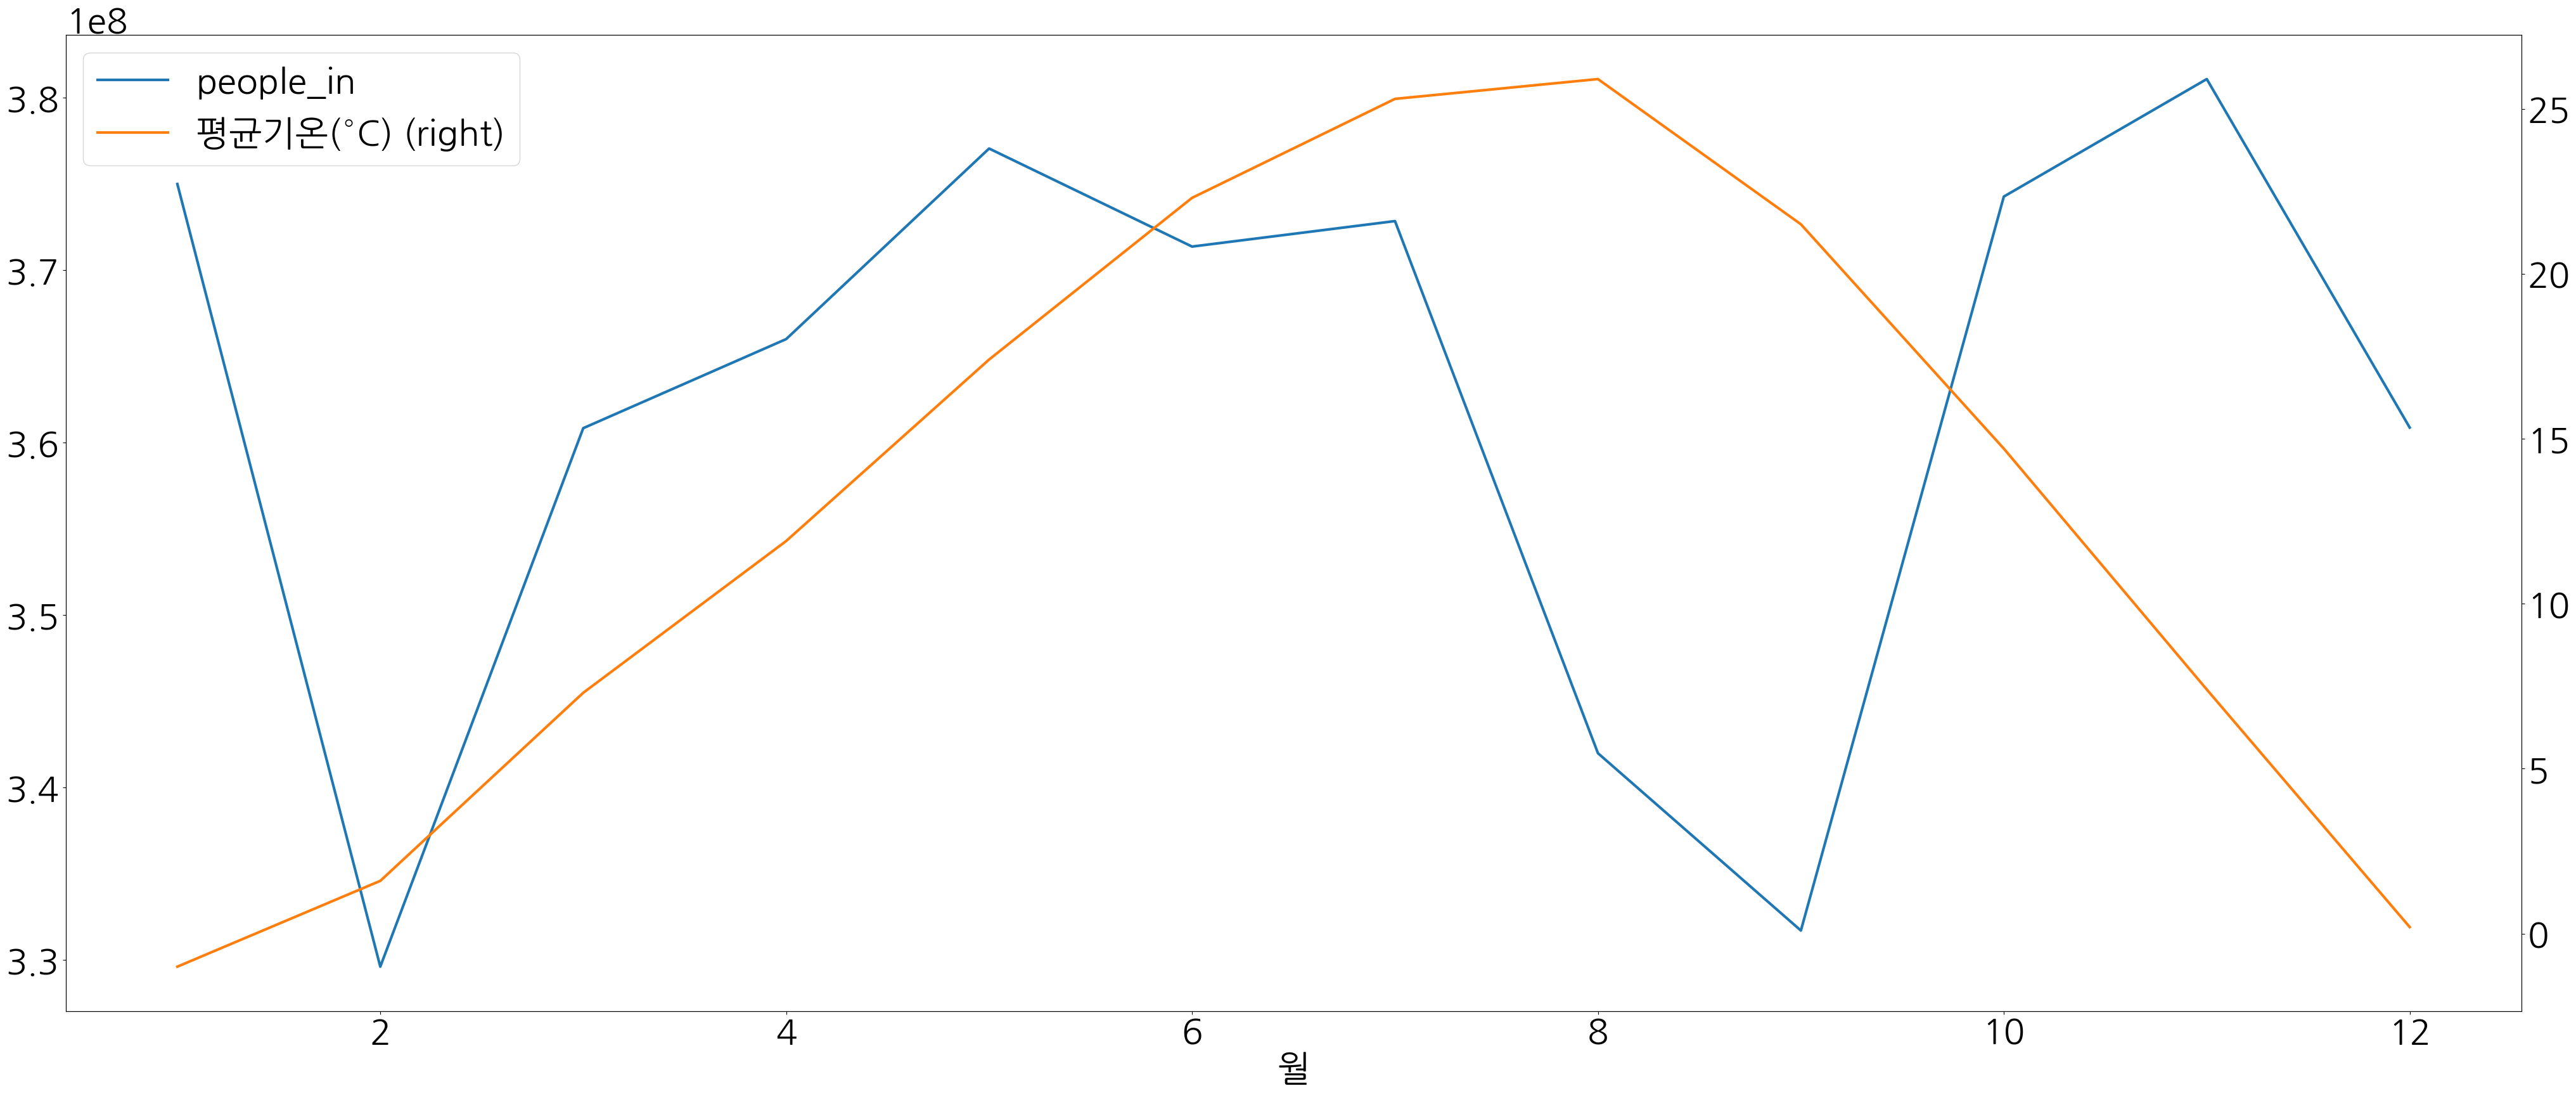

In [94]:
df_total_m.plot(figsize=(50,20), secondary_y="평균기온(°C)", lw = 3)
plt.rc('font', size=30)